# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** I Gusti Putu Ardan Setiawan
- **Email:** set1awanardan08@gamil.com
- **ID Dicoding:** ardansetiawan

## Menentukan Pertanyaan Bisnis

- Berapa total pendapatan yang dihasilakan selama periode q4 2017
- Berapa presentase pelanggan berulang (*Repeate buyers*)
- Berapakan rata-rata pesanan bulan pada tahun 2018 dan bagaimana perubahannya dari bulan ke bulan?
- Apa 5 kategori produk teratas yang menghasilakan volume pesanan terbanyak?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from datetime import timedelta
import matplotlib.dates as mdates


## Data Wrangling

### Gathering Data

In [175]:
# Load Dataset Customer_dataset.csv
customers_df = pd.read_csv('data/customers_dataset.csv')
print('Jumlah data', customers_df.shape[0])
customers_df.head()

Jumlah data 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [176]:
# Load Dataset Orders_dataset.csv
orders_df = pd.read_csv('data/orders_dataset.csv')
print('Jumlah data', orders_df.shape[0])
orders_df.head()

Jumlah data 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [177]:
# Load Dataset order_items
order_items_df = pd.read_csv('data/order_items_dataset.csv')
print('Jumlah data', order_items_df.shape[0])
order_items_df.head()

Jumlah data 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [178]:
#Load Dataset order_payments_dataset.csv
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
print('Jumlah data', order_payments_df.shape[0])
order_payments_df.head()

Jumlah data 103886


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [179]:
# Load Dataset order_reviews_dataset.csv
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
print('Jumlah data', order_reviews_df.shape[0])
order_reviews_df.head()

Jumlah data 99224


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [180]:
# Load Dataset products_dataset.csv
products_df =  pd.read_csv('data/products_dataset.csv')
print('Jumlah data', products_df.shape[0])
products_df.head()

Jumlah data 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [181]:
# Load Dataset product_category_name_translation.csv
products_category_translation_df = pd.read_csv('data/product_category_name_translation.csv')
print('Jumlah data', products_category_translation_df.shape[0])
products_category_translation_df.head()

Jumlah data 71


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [182]:
# Load Dataset sellers_dataset.csv
sellers_df = pd.read_csv('data/sellers_dataset.csv')
print('Jumlah data', sellers_df.shape[0])
sellers_df.head()

Jumlah data 3095


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [183]:
# Load Dataset Geolocation_dataset.csv
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
print('Jumlah data', geolocation_df.shape[0])
geolocation_df.head()

Jumlah data 1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- **Format Dataset**<br>
Dataset yang dikumpulkan dalam format **CSV** dan terdapat 9 dataset yang siap digunakan dalam proses analisis.<br>

- **Volume Dataset**<br>
 **customers** --> 99.441 *entries* data pelanggan menjadi basis data yang kuat, mencakup hampir 100 ribu entitas pelanggan<br>
 **orders**    --> 99.441 *entries* jumlah total pesanan sama persis dengan jumlah pelanggan hal ini mengindikasikan <br>
 bahwa data ini mungkin tidak mencakup pelanggan berulang (*repeat buyers*) yang melakukan pemesanan lebih dari sekali atau <br>
 mungkin dataset hanya mencatat satu pesanan per customer_id

- **Relasi Antar Tabel**<br> 
Relasi antar table akan digunakan untuk join/marge tabel pada tahap selanjutnya.<br>
(contoh relasi: **customer** dan **order** melalui customers.customer_id dan orders.customer_id)<br>

### Assessing Data

In [184]:
def assess_report(df: pd.DataFrame):
    """ 
        Fungsi untuk menampilkan laporan singkat dataset pada setiap kolomnya, mengenai:
            1. Missing Values,
            2. Duplikasi data, dan 
            3. Tipe Data.
        ====================
        Parameter:
            1. df --> Dataset yang ingin dilakukan assessment awal.
        ====================
        Return:
           report --> Fungsi mengembalikan Dataframe ringkasan assessment awal
        ====================
        Example Usage:
        customer_report = assess_report(customer_df)
        customer_report
    """
    report = []

    for col in df.columns:
        jumlah_missing = df[col].isna().sum()
        data_dups = df.duplicated().sum()
        persentase_missing = (jumlah_missing / len(df)) * 100

        report.append({
            "Culomn": col,
            "Tipe_data": str(df[col].dtype),
            "Missing_data": jumlah_missing,
            "Missing_pct": f"{persentase_missing:.2f}%",
            "Unique_values": df[col].nunique(),
            "Duplicated_Value": data_dups,
        })

    report = pd.DataFrame(report)

    return report

##### Menilai Tabel `customers_df`
Proses yang akan dilakukan adalah:
- Menilai kelengkapan data (*Missing values*)
- Menilai kesesuaian tipe data
- Menilai duplikasi dalam dataset
- Menilai konsistensi data 

In [185]:
customers_report = assess_report(customers_df)
customers_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,customer_id,object,0,0.00%,99441,0
1,customer_unique_id,object,0,0.00%,96096,0
2,customer_zip_code_prefix,int64,0,0.00%,14994,0
3,customer_city,object,0,0.00%,4119,0
4,customer_state,object,0,0.00%,27,0


In [186]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Menilai Tabel `order_df`


In [187]:
orders_report = assess_report(orders_df)
orders_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,order_id,object,0,0.00%,99441,0
1,customer_id,object,0,0.00%,99441,0
2,order_status,object,0,0.00%,8,0
3,order_purchase_timestamp,object,0,0.00%,98875,0
4,order_approved_at,object,160,0.16%,90733,0
5,order_delivered_carrier_date,object,1783,1.79%,81018,0
6,order_delivered_customer_date,object,2965,2.98%,95664,0
7,order_estimated_delivery_date,object,0,0.00%,459,0


In [188]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [189]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Menilai Tabel `order_items_df`


In [190]:
order_item_report = assess_report(order_items_df)
order_item_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,order_id,object,0,0.00%,98666,0
1,order_item_id,int64,0,0.00%,21,0
2,product_id,object,0,0.00%,32951,0
3,seller_id,object,0,0.00%,3095,0
4,shipping_limit_date,object,0,0.00%,93318,0
5,price,float64,0,0.00%,5968,0
6,freight_value,float64,0,0.00%,6999,0


In [191]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Menilai Tabel `order_payments_df`


In [192]:
payments_report = assess_report(order_payments_df)
payments_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,order_id,object,0,0.00%,99440,0
1,payment_sequential,int64,0,0.00%,29,0
2,payment_type,object,0,0.00%,5,0
3,payment_installments,int64,0,0.00%,24,0
4,payment_value,float64,0,0.00%,29077,0


In [193]:
order_payments_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [194]:
order_payments_df['payment_installments'].value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

In [195]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Menilai Tabel `order_reviews_df`


In [196]:
reviews_report = assess_report(order_reviews_df)
reviews_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,review_id,object,0,0.00%,98410,0
1,order_id,object,0,0.00%,98673,0
2,review_score,int64,0,0.00%,5,0
3,review_comment_title,object,87656,88.34%,4527,0
4,review_comment_message,object,58247,58.70%,36159,0
5,review_creation_date,object,0,0.00%,636,0
6,review_answer_timestamp,object,0,0.00%,98248,0


In [197]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Menilai Tabel `porducts_df`


In [198]:
products_report = assess_report(products_df)
products_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,product_id,object,0,0.00%,32951,0
1,product_category_name,object,610,1.85%,73,0
2,product_name_lenght,float64,610,1.85%,66,0
3,product_description_lenght,float64,610,1.85%,2960,0
4,product_photos_qty,float64,610,1.85%,19,0
5,product_weight_g,float64,2,0.01%,2204,0
6,product_length_cm,float64,2,0.01%,99,0
7,product_height_cm,float64,2,0.01%,102,0
8,product_width_cm,float64,2,0.01%,95,0


In [199]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Menilai Tabel `product_category_translation_df`


In [200]:
product_category_report = assess_report(products_category_translation_df)
product_category_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,product_category_name,object,0,0.00%,71,0
1,product_category_name_english,object,0,0.00%,71,0


In [201]:
products_category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Menilai Tabel `seller_df`


In [202]:
sellers_report = assess_report(sellers_df)
sellers_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,seller_id,object,0,0.00%,3095,0
1,seller_zip_code_prefix,int64,0,0.00%,2246,0
2,seller_city,object,0,0.00%,611,0
3,seller_state,object,0,0.00%,23,0


In [203]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### Menilai Tabel `geolocation_df`


In [204]:
geolocation_report = assess_report(geolocation_df)
geolocation_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,geolocation_zip_code_prefix,int64,0,0.00%,19015,261831
1,geolocation_lat,float64,0,0.00%,717360,261831
2,geolocation_lng,float64,0,0.00%,717613,261831
3,geolocation_city,object,0,0.00%,8011,261831
4,geolocation_state,object,0,0.00%,27,261831


In [205]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [206]:
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


**Insight:**
- ***Missing Values***<br>
Terdapat missing values pada beberapa tabel seperti:
1. order_df: `order_approved_at`, `order_delivered_currier_date`, `order_delivered_customer_date`.
2. order_reviews_df: `comment_title`, `comment_message`.
3. products_df: semua kolom kecuali `product_id`.
<br>
- **Format tipe data**<br>
Kolom datetime berikut perlu dikonversi dari object:
1. order_df: Semua kolom timestamp (mis. `order_purchase_timestamp`, dll).
2. order_items_df: `shipping_limit_date`.
3. order_reviews_df: `creation_date`, `answer_date`.

- **Data kategorikal teridentifikasi**
1. order_payments_df: `payment_type` (5 kategori: credit_card, boleto, voucher, debit_card, not_defined) dan `payment_installments` (24 kategori: 0-23x).
2. order_df: `order_status` (8 kategori: delivered, shipped, canceled, dll).

- **Inkonsistensi Data (Geolocation)**<br>
Tabel geolocation_df memiliki inkonsistensi penulisan nama kota.<br>
**Contoh**: sao paulo vs são paulo.<br>
Dampak: Menyebabkan 8011 nama kota unik yang tidak akurat (seharusnya jauh lebih sedikit untuk 27 states).<br>
Rekomendasi: Perlu standardisasi dan pembersihan (mapping via zip_code_prefix)

### Cleaning Data

Membersihakan tabel `order_df`

In [207]:
orders_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,order_id,object,0,0.00%,99441,0
1,customer_id,object,0,0.00%,99441,0
2,order_status,object,0,0.00%,8,0
3,order_purchase_timestamp,object,0,0.00%,98875,0
4,order_approved_at,object,160,0.16%,90733,0
5,order_delivered_carrier_date,object,1783,1.79%,81018,0
6,order_delivered_customer_date,object,2965,2.98%,95664,0
7,order_estimated_delivery_date,object,0,0.00%,459,0


In [208]:
# buat copy dari tabel asli agar tidak merusak data asli
order_prep = orders_df.copy() 
order_sebelum = order_prep[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum()
order_sebelum

order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

In [209]:
# karena prsentase missing Values pada kolom-kolom tersebut masih dibawah 10% bisa kita drop
order_prep = order_prep.dropna()
order_prep.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [210]:
# Konversikan Tipe Data DateTime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_columns:
    order_prep[col] = pd.to_datetime(order_prep[col])

order_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [211]:
# konversi Tipe data untuk `order_status` menjadi category
order_prep['order_status'] = order_prep['order_status'].astype('category')

### Membersihkan Tabel `order_reviews_df`

In [212]:
# Menangani Missing Values
reviews_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,review_id,object,0,0.00%,98410,0
1,order_id,object,0,0.00%,98673,0
2,review_score,int64,0,0.00%,5,0
3,review_comment_title,object,87656,88.34%,4527,0
4,review_comment_message,object,58247,58.70%,36159,0
5,review_creation_date,object,0,0.00%,636,0
6,review_answer_timestamp,object,0,0.00%,98248,0


In [213]:
# buat copy dari tabel asli agar tidak merusak data asli
reviews_prep = order_reviews_df.copy()
sebelum_reviews = reviews_prep.isna().sum() 
sebelum_reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [214]:
# Karena Jumlah missing values nya banyak mengunakan teknik Imputasi
imputasi_value = {
    'review_comment_title': "No title",
    'review_comment_message': "no comment",
}

reviews_prep.fillna(value=imputasi_value, inplace=True)
reviews_prep.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [215]:
# Konversi Tipe data 
datetime_columns = ['review_creation_date', 'review_answer_timestamp']
for col in datetime_columns:
    reviews_prep[col] = pd.to_datetime(reviews_prep[col])

reviews_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Membersihkan Tabel `order_items_df`

In [216]:
order_item_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,order_id,object,0,0.00%,98666,0
1,order_item_id,int64,0,0.00%,21,0
2,product_id,object,0,0.00%,32951,0
3,seller_id,object,0,0.00%,3095,0
4,shipping_limit_date,object,0,0.00%,93318,0
5,price,float64,0,0.00%,5968,0
6,freight_value,float64,0,0.00%,6999,0


In [217]:
# Konversi tipe data pada kolom `shipping_limit_date` ke datetime
order_items_prep = order_items_df.copy()
order_items_prep['shipping_limit_date'] = pd.to_datetime(order_items_prep['shipping_limit_date'])
order_items_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Memberiskan Tabel `products_df`

In [218]:
products_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,product_id,object,0,0.00%,32951,0
1,product_category_name,object,610,1.85%,73,0
2,product_name_lenght,float64,610,1.85%,66,0
3,product_description_lenght,float64,610,1.85%,2960,0
4,product_photos_qty,float64,610,1.85%,19,0
5,product_weight_g,float64,2,0.01%,2204,0
6,product_length_cm,float64,2,0.01%,99,0
7,product_height_cm,float64,2,0.01%,102,0
8,product_width_cm,float64,2,0.01%,95,0


In [219]:
#konversikan product_name jadi tipe data category
product_prep  = products_df.copy()
product_prep['product_category_name']  = product_prep['product_category_name'].astype('category')

### Membersihkan Tabel `geolocation_df`
memperbaiki ketidakan konsitenan dalam penulisan data

In [220]:
geolocation_report

,Culomn,Tipe_data,Missing_data,Missing_pct,Unique_values,Duplicated_Value
0,geolocation_zip_code_prefix,int64,0,0.00%,19015,261831
1,geolocation_lat,float64,0,0.00%,717360,261831
2,geolocation_lng,float64,0,0.00%,717613,261831
3,geolocation_city,object,0,0.00%,8011,261831
4,geolocation_state,object,0,0.00%,27,261831


In [221]:
geolocation_prep = geolocation_df.copy()
# Buat kolom baru yang sudah bersih
# 1. Ubah ke string (untuk menghindari error jika ada angka)
# 2. Hapus aksen (contoh: 'são paulo' -> 'sao paulo')
# 3. Ubah ke huruf kecil
# 4. Hapus spasi di awal/akhir
geolocation_prep['city_cleaned'] = geolocation_prep['geolocation_city'].astype(str).apply(unidecode).str.lower().str.strip()
geolocation_prep['state_cleaned'] = geolocation_prep['geolocation_state'].astype(str).str.upper().str.strip() # State biasanya huruf besar


In [222]:
geolocation_prep[['city_cleaned', ]].nunique()

city_cleaned    5968
dtype: int64

**Insight:**
- Seluruh missing value telah di perbaiki dengan berbagai cara antara lain:
  1. mengunakan drop untuk tabel `orders_df` karena missing value kurang dari **5%**
  2. mengunakan teknik imputasi pada tabel `order_reviews_df`
- Memperbaiki Seluruh Tipe data yang seharusnya **Datetime**
- Memperbaiki ketidak konsitenan penulisan nama kota pada tabel `geolocation_df`<br>
  ini mungking tidak akan berpengaruh kedalam analisi karena akan lebih berfokus pada pengguna `kode pose`
- Pada tabel `geolocation_df` terdapat cukup banyak data duplikasi namun karena `geolocation_zip_code_prefix` bisa memiliki kordinat yang berbeda-beda. jadi ketika harus memperhatikan jika ingin melakukan join tabel, maka hanya bisa mengunakan `geolocation_zip_code_prefix` pada tabel customers_df dan sellers_df, Dan kita juga memiliki data nama kota dan state pad tabel customers_df dan sellers_df maka kita bisa mengunakan itu.

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [223]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58965,e29b173e2f8fdd7546b5d3cca8385032,9a401204217ee04e12b8f097f80bbfd8,6362,carapicuiba,SP
8251,522d542f869e1cd1db0df769db11b761,fe28d443ab89dc67f5858bc2beda299a,20251,rio de janeiro,RJ
76892,92db95c5c6712934fb892c519b3aab15,a28d7299d0cd5fe841801574ecf7c5f7,97032,santa maria,RS
85093,3101e9e2d592df1da88ec72302bb87b1,c7f4afeac875a85d51aa4ff11ad70f03,5422,sao paulo,SP
34144,8d17a0679312b6c68213eb0c197b3c48,d4ec1db68ee6fafe0ce4293bdf2c1b4a,71699,brasilia,DF


In [282]:
# Kota dengan customer terbanyak
customers_df.groupby(by='customer_city')[['customer_id']].count().sort_values(by='customer_id', ascending=False).head(5)

,customer_id,customer_unique_id
customer_city,,
sao paulo,15540,15540
rio de janeiro,6882,6882
belo horizonte,2773,2773
brasilia,2131,2131
curitiba,1521,1521


In [225]:
customers_df.groupby(by='customer_state')[['customer_id', 'customer_unique_id']].nunique().sort_values(by='customer_id', ascending=False).head(5)

,customer_id,customer_unique_id
customer_state,,
SP,41746,40302
RJ,12852,12384
MG,11635,11259
RS,5466,5277
PR,5045,4882


### Explore `orders_df`

In [226]:
order_prep.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
64054,9c5e59d13402e43348641c0293487f76,9d9addc37267270ff9165305944bc9eb,delivered,2018-08-19 18:19:11,2018-08-20 12:50:25,2018-08-21 13:25:00,2018-08-28 23:36:36,2018-09-04
32404,47a9a1491f70a8280d5f449baaba7c03,9c62b85664e1ec0955cead693b1c74af,delivered,2018-02-02 13:40:38,2018-02-02 14:51:44,2018-02-03 01:04:02,2018-02-07 11:10:28,2018-03-02
40031,9b402354813f3cab904867d9ca2dfc92,8557eb2ca315c2368a3bc93748fe49c2,delivered,2018-02-18 15:18:40,2018-02-18 16:26:31,2018-02-19 20:37:50,2018-03-02 18:48:29,2018-03-14
55734,8a86e7cff2154483000ed469d5f528ba,c8fcd19ff9dde8ea152754737f5e4be3,delivered,2018-01-08 23:02:25,2018-01-08 23:13:27,2018-01-11 17:27:45,2018-01-23 23:48:53,2018-01-31
17569,7646f2fa9419a132d8ff5528846a48d3,b9374bfb8d4215e1fc67d31d2be24191,delivered,2018-03-03 22:28:24,2018-03-03 22:48:20,2018-03-09 20:07:46,2018-04-29 21:12:32,2018-04-16


In [286]:
# Menghitung Total pendapatan pada periode q4 tahun 2017
# filter orderan pada Q4 2017
q4_orders = order_prep[
    (order_prep['order_purchase_timestamp'].dt.year == 2017) & 
    (order_prep['order_purchase_timestamp'].dt.quarter == 4)
]

# 2. Gabungkan (Merge) untuk mendapatkan harga
q4_merged = pd.merge(q4_orders[['order_id', 'customer_unique_id']], 
                     order_items_prep[['order_id', 'price', 'freight_value']], 
                     on='order_id',
                     how= 'left')

In [287]:
# 3. Hitung Total Pendapatan/Revenue
# Total Revenue = Total (Price + Freight Value)
total_revenue_q4_2017 = (q4_merged['price'].sum())

print(f"Total Pendapatan Q4 2017: {total_revenue_q4_2017:,.2f} R$")

Total Pendapatan Q4 2017: 2,375,357.31 R$


In [302]:
# pesanan bulanan pada tahun 2018

# filter orderan pada tahun 2018
orders_2018 = order_prep[order_prep['order_purchase_timestamp'].dt.year == 2018]

order_per_month = orders_2018.groupby(by=orders_2018['order_purchase_timestamp'].dt.month_name())['order_id'].count()

# Urutan Bulan yang Benar (Standar)
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

order_per_month.index = pd.CategoricalIndex(order_per_month.index, 
                                                   categories=bulan_order, 
                                                   ordered=True)

orders_per_month_sorted = order_per_month.sort_index()

In [305]:
# Hitung Rata-Rata Keseluruhan
rata_rata_order_bulanan = orders_per_month_sorted.mean()

print(f"Rata-rata Order Bulanan Keseluruhan (2018): {rata_rata_order_bulanan:,.2f}")
print("\nJumlah Orderan Rinci per Bulan:")
print(orders_per_month_sorted)

Rata-rata Order Bulanan Keseluruhan (2018): 6,623.50

Jumlah Orderan Rinci per Bulan:
order_purchase_timestamp
January     7109
February    6640
March       7041
April       6809
May         6757
June        6102
July        6177
August      6353
Name: order_id, dtype: int64


In [229]:

# menyiapan data yang diperlukan untuk explorasi 
tmp_df_payments = (
    order_payments_df.groupby('order_id', as_index=False)
    .agg(tmp_payment_types = ('payment_type', lambda x: ', '.join(x.unique())),
         tmp_payment_installments = ('payment_installments', lambda x: ', '.join(x.astype(str).unique())))
)
tmp_df_items = (
    order_items_prep.merge(product_prep, on='product_id', how='left')
    .assign(product_category_name = lambda x: x['product_category_name'].cat.add_categories(['missed in df_products']))
    .fillna({'product_category_name': 'missed in df_products'})
    .groupby('order_id', as_index=False)
    .agg(tmp_product_categories = ('product_category_name', lambda x: ', '.join(x.unique())))
)

# Membuat relasi antar table
order_prep = (
    order_prep.merge(reviews_prep, on='order_id', how='left')
    .merge(tmp_df_payments, on='order_id', how='left')
    .merge(tmp_df_items, on='order_id', how='left')
    .merge(customers_df[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], on= 'customer_id', how='left')
    .rename(columns={'customer_state': 'tmp_customer_state'})
)

In [230]:
# membuat kolom baru untuk memperkaya data saat proses explorasi
order_prep['tmp_payment_types'] = order_prep['tmp_payment_types'].fillna('Missing in Pays').astype('category')

order_prep['tmp_order_purchase_year'] = order_prep['order_purchase_timestamp'].dt.year.fillna('Missing purchase dt').astype('category')

order_prep['tmp_order_purchase_month'] = order_prep['order_purchase_timestamp'].dt.month_name().fillna('Missing purchase dt').astype('category')

order_prep['tmp_order_purchase_quartal'] = order_prep['order_purchase_timestamp'].dt.quarter.fillna('Missing purchase dt').astype('category')

order_prep['tmp_order_purchase_weekday'] = order_prep['order_purchase_timestamp'].dt.day_name().fillna('Missing purchase dt').astype('category')

In [231]:
# melakukan pembuatan feature waktu pagi, siang, sore, dan malam untuk proses ekplorasi
conditions = [
    order_prep['order_purchase_timestamp'].isna()                      
    , order_prep['order_purchase_timestamp'].dt.hour.between(4,11)
    , order_prep['order_purchase_timestamp'].dt.hour.between(12,16)
    , order_prep['order_purchase_timestamp'].dt.hour.between(17,22)
    , order_prep['order_purchase_timestamp'].dt.hour.isin([23, 0, 1, 2, 3])
]
choices = ['Missing purchase dt', 'Morning', 'Afternoon', 'Evening', 'Night']
order_prep['tmp_purchase_time_of_day'] = np.select(conditions, choices, default='Missing purchase dt')
order_prep['tmp_purchase_time_of_day'] = order_prep['tmp_purchase_time_of_day'].astype('category')


In [232]:
# melakukan pembuatan feature keterlambatan kedatangan orderan untuk proses ekplorasi
conditions = [
    order_prep['order_delivered_customer_date'].isna() | order_prep['order_estimated_delivery_date'].isna()
    , order_prep['order_delivered_customer_date'] > order_prep['order_estimated_delivery_date']            
    , order_prep['order_delivered_customer_date'] <= order_prep['order_estimated_delivery_date']                           
]
choices = ['Missing delivery dt', 'Delayed', 'Not Delayed']
order_prep['tmp_is_delayed'] = np.select(conditions, choices, default='Missing delivery dt')
order_prep['tmp_is_delayed'] = order_prep['tmp_is_delayed'].astype('category')


In [233]:
# melakukan pembuatan feature waktu yang dibutuhkan untuk proses pengiriman.
delivery_time = order_prep['order_delivered_customer_date'] - order_prep['order_delivered_carrier_date'] 
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_prep['delivery_time'] =  round(delivery_time/86400)

In [234]:
# Gourping customer berdasakan pembelian lebih dari 1
customer_order_count = (order_prep.groupby(by= ['customer_unique_id'])['order_id'].nunique().reset_index(name='order_count').sort_values(by='order_count', ascending= False))

repeat_customer = customer_order_count[customer_order_count['order_count'] > 1]

# 3. Tampilkan hasilnya
print("Jumlah Pelanggan yang Melakukan Pembelian Lebih dari Satu Kali:")
print(f"Total Pelanggan Berulang: {len(repeat_customer)}")

print("\nDetail Pelanggan Berulang (ID Pelanggan : Jumlah Pesanan):")
repeat_customer.head(10)

Jumlah Pelanggan yang Melakukan Pembelian Lebih dari Satu Kali:
Total Pelanggan Berulang: 2800

Detail Pelanggan Berulang (ID Pelanggan : Jumlah Pesanan):


,customer_unique_id,order_count
51424,8d50f5eadf50201ccdcedfb9e2ac8455,15
22775,3e43e6105506432c953e165fb2acf44c,9
73909,ca77025e7201e3b30c44b472ff346268,7
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,7
36702,6469f99c1f9dfae7733b25662e7f1782,7
80524,dc813062e0fc23409cd255f7f53c7074,6
26253,47c1a3033b8b77b3ab6e109eb4d5fdf3,6
87869,f0e310a6839dce9de1638e0fe5ab282a,6
6964,12f5d6e1cbf93dafd9dcc19095df0b3d,6
36496,63cfc61cee11cbe306bff5857d00bfe4,6


In [334]:
presentasi_repeates_buyers = round(len(repeat_customer) / len(customers_df) * 100, 3)
print(f'persentasi repeats buyers: {presentasi_repeates_buyers}%')


persentasi repeats buyers: 2.816%


In [401]:
# Grouping coustomer
status = order_prep.groupby(by= 'order_status')[['customer_id', 'order_id']].count().sort_values(by = 'customer_id',ascending=False)

C:\Users\igust\AppData\Local\Temp\ipykernel_2108\3385956774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status = order_prep.groupby(by= 'order_status')[['customer_id', 'order_id']].count().sort_values(by = 'customer_id',ascending=False)


In [403]:
total_orders = status['order_id'].sum()

delivered_count  = status.loc['delivered', 'order_id']
persentase_delivered = (delivered_count / total_orders) * 100

print(f"Total Order: {total_orders:,}")
print(f"Order Delivered: {delivered_count:,}")
print(f"Persentase Delivered: {persentase_delivered:.4f}%")

Total Order: 96,990
Order Delivered: 96,984
Persentase Delivered: 99.9938%


In [254]:
# Grouping orderan per kuartal per tahun
quarterley_order = order_prep.groupby(by=['tmp_order_purchase_year', 'tmp_order_purchase_quartal'])['order_id'].count().reset_index(name = 'Jumlah_orderan').sort_values(by=['tmp_order_purchase_year', 'tmp_order_purchase_quartal'])

print("Jumlah Orderan per Kuartal:")
quarterley_order

Jumlah Orderan per Kuartal:


C:\Users\igust\AppData\Local\Temp\ipykernel_2108\2118086559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterley_order = order_prep.groupby(by=['tmp_order_purchase_year', 'tmp_order_purchase_quartal'])['order_id'].count().reset_index(name = 'Jumlah_orderan').sort_values(by=['tmp_order_purchase_year', 'tmp_order_purchase_quartal'])


,tmp_order_purchase_year,tmp_order_purchase_quartal,Jumlah_orderan
0,2016,1,0
1,2016,2,0
2,2016,3,1
3,2016,4,273
4,2017,1,4965
5,2017,2,9056
6,2017,3,12322
7,2017,4,17385
8,2018,1,20790
9,2018,2,19668


In [255]:
# Jumlah orderan berdasarkan waktu pembelian per hari
waktu_order = order_prep.groupby(by= 'tmp_purchase_time_of_day')['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)

print("Jumlah Orderan berdasarkan Waktu dalam sehari:")
waktu_order

Jumlah Orderan berdasarkan Waktu dalam sehari:


C:\Users\igust\AppData\Local\Temp\ipykernel_2108\1599542310.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  waktu_order = order_prep.groupby(by= 'tmp_purchase_time_of_day')['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)


,tmp_purchase_time_of_day,jumlah_orderan
1,Evening,35248
0,Afternoon,31366
2,Morning,22102
3,Night,8274


In [335]:
# jumlah orderan perbualan dari tahun 2016-2018
bulan_orderan = order_prep.groupby(by= ['tmp_order_purchase_month', 'tmp_order_purchase_year'])['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)

print("Jumlah Orderan berdasarkan bulan darit 2016-2018:")
bulan_orderan = bulan_orderan[bulan_orderan['jumlah_orderan'] >= 1]
bulan_orderan

Jumlah Orderan berdasarkan bulan darit 2016-2018:


C:\Users\igust\AppData\Local\Temp\ipykernel_2108\1415141520.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulan_orderan = order_prep.groupby(by= ['tmp_order_purchase_month', 'tmp_order_purchase_year'])['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)


,tmp_order_purchase_month,tmp_order_purchase_year,jumlah_orderan
28,November,2017,7340
14,January,2018,7109
23,March,2018,7041
2,April,2018,6809
26,May,2018,6757
11,February,2018,6640
5,August,2018,6353
17,July,2018,6177
20,June,2018,6102
7,December,2017,5539


In [352]:
# jumlah orderan perbualan dari tahun 2016-2018
bulan_orderan1 = order_prep.groupby(by= ['order_purchase_timestamp'])['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)

print("Jumlah Orderan berdasarkan bulan darit 2016-2018:")
bulan_orderan1 = bulan_orderan1[bulan_orderan1['jumlah_orderan'] >= 1]
bulan_orderan1

Jumlah Orderan berdasarkan bulan darit 2016-2018:


,order_purchase_timestamp,jumlah_orderan
63867,2018-03-31 15:08:21,5
729,2017-01-26 13:15:41,4
34240,2017-11-22 11:39:00,4
84073,2018-07-04 01:20:01,4
15657,2017-07-13 21:03:44,4
...,...,...
95918,2018-08-28 19:31:41,1
95919,2018-08-28 19:32:05,1
95920,2018-08-28 19:32:31,1
95921,2018-08-28 19:44:25,1


In [258]:
# top 5 state dengan orderan terbanyak
state_orderan = order_prep.groupby(by= 'tmp_customer_state')['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)

print("Jumlah Orderan berdasarkan State:")
#state_orderan = state_orderan[state_orderan['jumlah_orderan'] > 1]
state_orderan.head(5)

Jumlah Orderan berdasarkan State:


,tmp_customer_state,jumlah_orderan
25,SP,40700
18,RJ,12421
10,MG,11421
22,RS,5379
17,PR,4942


In [259]:
# top 5 state dengan orderan terbanyak
kategori_item_orderan = order_prep.groupby(by= 'tmp_product_categories')['order_id'].count().reset_index(name="jumlah_orderan").sort_values(by='jumlah_orderan', ascending=False)

print("Jumlah Orderan berdasarkan kategori:")

kategori_item_orderan.head(10)

Jumlah Orderan berdasarkan kategori:


,tmp_product_categories,jumlah_orderan
80,cama_mesa_banho,9181
51,beleza_saude,8630
180,esporte_lazer,7506
233,informatica_acessorios,6528
293,moveis_decoracao,6152
398,utilidades_domesticas,5648
370,relogios_presentes,5462
388,telefonia,4069
16,automotivo,3788
68,brinquedos,3761


### Explorasi tabel `order_items_df`

**Insight:**
- ##### customer
  1. top 5 kota dengan customer terbanyak sao paulo = 15540, rio de janeiro = 6882, belo horizonte= 2773, brasilia = 2131, curitiba = 1521
  2. Jumlah pelanggan berulang *repeat buyers* = 2800
  3. persentasi *repeat buyers* = 2.8%
- ### pendapatan dan order
  1. pendapatan Q4 Tahun 2017 = R$ 2,375,357.31
  2. Bulan dengan order terbanyak  = januari
  3. Presentasi order Delivered = 99.99%
  4. jumlah order terbanyak per kuartal = Q1 tahun 2018 dengan total 20,790 orderan
  5. Waktu paling customer melakukan pembelian adalah saat **sore** hari
  6. Puncak tertinggi orderan ada pada bulan November 2017
  7. tren penurunan penjualan bulanan terjadi pada tahun 2018
- ### kategori
  top 5 kategori ama_mesa_banho	9181, beleza_saude	8630, esporte_lazer	7506, informatica_acessorios 6528, moveis_decoracao	615

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapakan rata-rata pesanan bulan pada tahun 2018 dan bagaimana perubahannya dari bulan ke bulan?


<Figure size 1000x600 with 0 Axes>

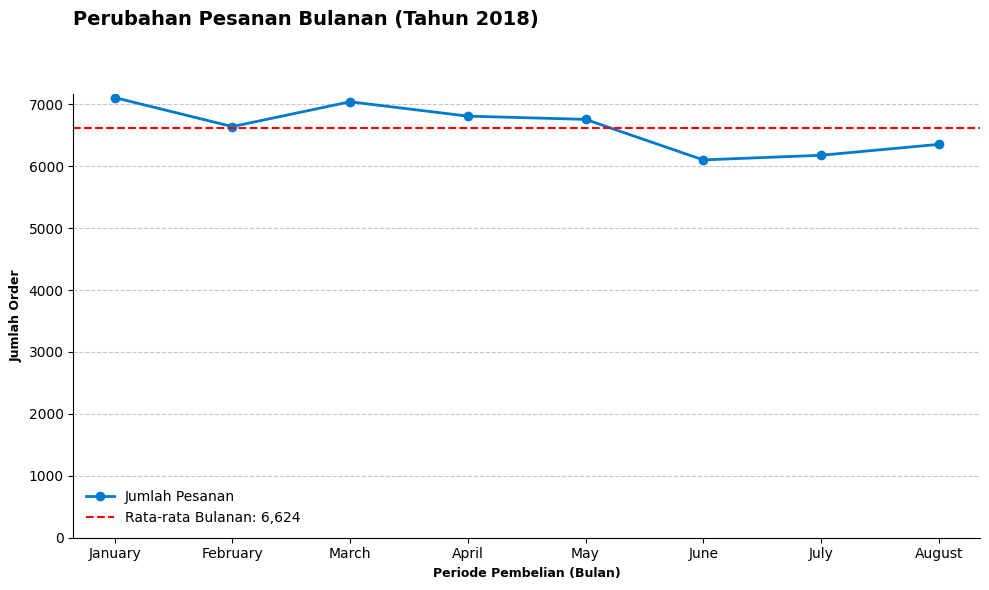

In [340]:
orders_per_month = pd.DataFrame(orders_per_month_sorted)
orders_per_month

plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Garis (Line Plot)
ax.plot(
    orders_per_month,
    marker='o',
    color='#007ACC',  # Warna biru kustom
    linewidth=2,      # Menebalkan ukuran dari line (linewidth)
    label='Jumlah Pesanan'
)

# Menambahkan garis rata-rata horizontal
plt.axhline(y=rata_rata_order_bulanan, color='r', linestyle='--', 
            label=f'Rata-rata Bulanan: {rata_rata_order_bulanan:,.0f}')

# Kustomisasi Judul dan Label
# Mengubah Judul Visualisasi (Kiri Atas)
ax.set_title(
    "Perubahan Pesanan Bulanan (Tahun 2018)", 
    loc='left', # Menetapkan posisi judul di KIRI atas
    fontsize=14, 
    fontweight='semibold', # Ketebalan tulisan (font weight)
    pad=50, # Jarak judul dari plot
)

# Mengganti Judul Sumbu X dan Y
ax.set_xlabel(
    "Periode Pembelian (Bulan)", 
    fontsize= 9, 
    fontweight='semibold',
)
ax.set_ylabel(
    "Jumlah Order", 
    fontsize=9, 
    fontweight='semibold'
)

# Mengecilkan Tulisan Ticks (Label di Sumbu)
ax.tick_params(axis='both', labelsize=10)

# Menghapus Bingkai Plot (Meningkatkan Data-Ink Ratio)
sns.despine(left=False, bottom=False)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Grid tetap di sumbu Y

plt.legend(frameon=False) # Menghapus bingkai legenda
plt.tight_layout()
plt.ylim(ymin=0)
plt.show()

### Pertanyaan :  Apa 5 kategori produk teratas yang menghasilakan volume pesanan terbanyak?

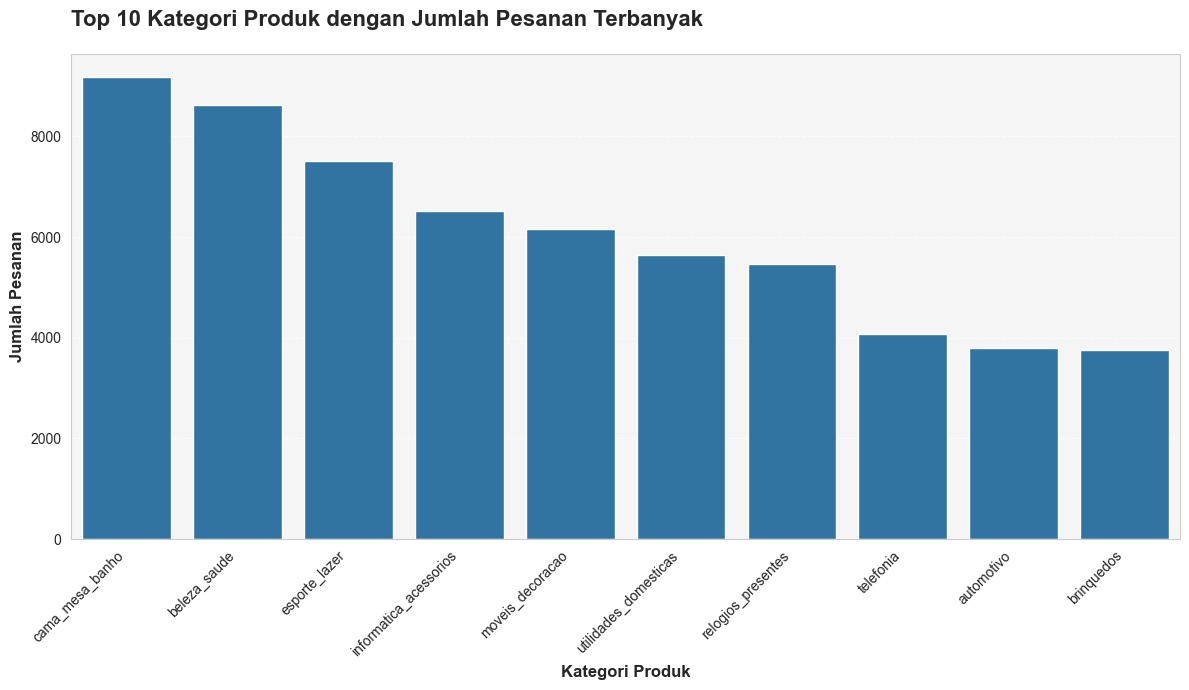

In [406]:
plt.figure(figsize=(12, 7))

# Membuat Bar Plot menggunakan Seaborn
sns.barplot(
    # Kolom kategori sebagai sumbu X
    x='tmp_product_categories', 
    # Kolom jumlah order sebagai sumbu Y
    y='jumlah_orderan', 
    data=kategori_item_orderan.head(10), # Plot hanya 10 kategori teratas
)

# Kustomisasi Visual Matplotlib
plt.title(
    "Top 10 Kategori Produk dengan Jumlah Pesanan Terbanyak",
    loc='left', 
    fontsize=16, 
    fontweight='bold', 
    pad=20
)
plt.xlabel("Kategori Produk", fontsize=12, fontweight='semibold')
plt.ylabel("Jumlah Pesanan", fontsize=12, fontweight='semibold')

# Memutar label sumbu X agar tidak bertumpuk
plt.xticks(rotation=45, ha='right')

# Menambahkan grid pada sumbu Y untuk mempermudah pembacaan nilai
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Mengatur tata letak agar label tidak terpotong
plt.show()

### Visualisasi Order per Quartal tahun 2017-2018

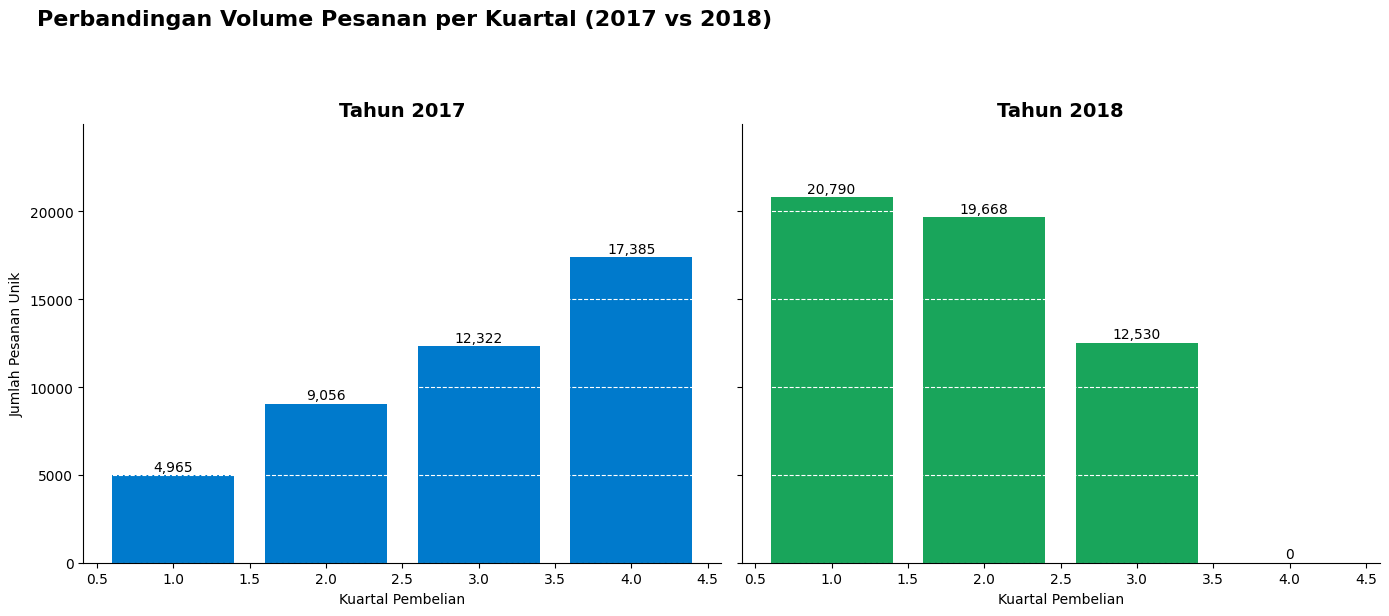

In [348]:
# Tentukan batas maksimum Y yang akan dipakai bersama (prinsip share Y-axis)
max_y = quarterley_order['Jumlah_orderan'].max() * 1.2

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 6), 
    sharey=True # Sumbu Y berbagi skala agar perbandingan akurat
)

# Judul Utama Figure (Kiri Atas)
fig.suptitle(
    "Perbandingan Volume Pesanan per Kuartal (2017 vs 2018)", 
    x=0.03, y=1.02, ha='left', fontsize=16, fontweight='bold'
)

# --- Subplot 1: Tahun 2017 (Index 0) ---
df_2017 = quarterley_order[quarterley_order['tmp_order_purchase_year'] == 2017]
ax = axes[0]
ax.bar(
    df_2017['tmp_order_purchase_quartal'], 
    df_2017['Jumlah_orderan'], 
    color='#007ACC', # Warna Bar
    width=0.8
)
ax.set_title("Tahun 2017", fontsize=14, fontweight='semibold')
ax.set_xlabel("Kuartal Pembelian")
ax.set_ylabel("Jumlah Pesanan Unik")
ax.set_ylim(0, max_y) # Mengatur batas Y dari 0

# Menambahkan label nilai di atas bar (Data-Ink Ratio)
for i, v in enumerate(df_2017['Jumlah_orderan']):
    ax.text(df_2017['tmp_order_purchase_quartal'].iloc[i], v + max_y * 0.01, 
            f'{v:,.0f}', color='black', ha='center', fontsize=10)


# --- Subplot 2: Tahun 2018 (Index 1) ---
df_2018 = quarterley_order[quarterley_order['tmp_order_purchase_year'] == 2018]
ax = axes[1]
ax.bar(
    df_2018['tmp_order_purchase_quartal'], 
    df_2018['Jumlah_orderan'], 
    color='#19A55B', # Warna Bar
    width=0.8
)
ax.set_title("Tahun 2018", fontsize=14, fontweight='semibold')
ax.set_xlabel("Kuartal Pembelian")

# Menambahkan label nilai di atas bar (Data-Ink Ratio)
for i, v in enumerate(df_2018['Jumlah_orderan']):
    ax.text(df_2018['tmp_order_purchase_quartal'].iloc[i], v + max_y * 0.01, 
            f'{v:,.0f}', color='black', ha='center', fontsize=10)

# Kustomisasi Grid dan Ticks (untuk kedua subplot)
for ax in axes:
    ax.grid(True, axis='y', linestyle='--', color='white') # Grid horizontal putih
    ax.tick_params(axis='both', labelsize=10)
    sns.despine(ax=ax, left=False, bottom=False) # Menghilangkan bingkai
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [363]:
# Set Index ke Kolom Tanggal
orders_indexed = order_prep.set_index('order_purchase_timestamp')

# 3. Resample dan Hitung (Agregasi)
# 'M' = Monthly (Bulanan), lalu hitung jumlah order_id unik
orders_per_month_all = (
    orders_indexed.resample('M')
    ['order_id']
    .count()
)

# Hitung Rata-Rata Keseluruhan
rata_rata_all = orders_per_month_all.mean()

# Terapkan Style Seaborn (untuk tampilan profesional)
sns.set_style("whitegrid", {"axes.facecolor": "#f5f5f5", "grid.color": "white"})

C:\Users\igust\AppData\Local\Temp\ipykernel_2108\1251976157.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_indexed.resample('M')


### Visualisasi Tren penjual all time

<Figure size 1400x700 with 0 Axes>

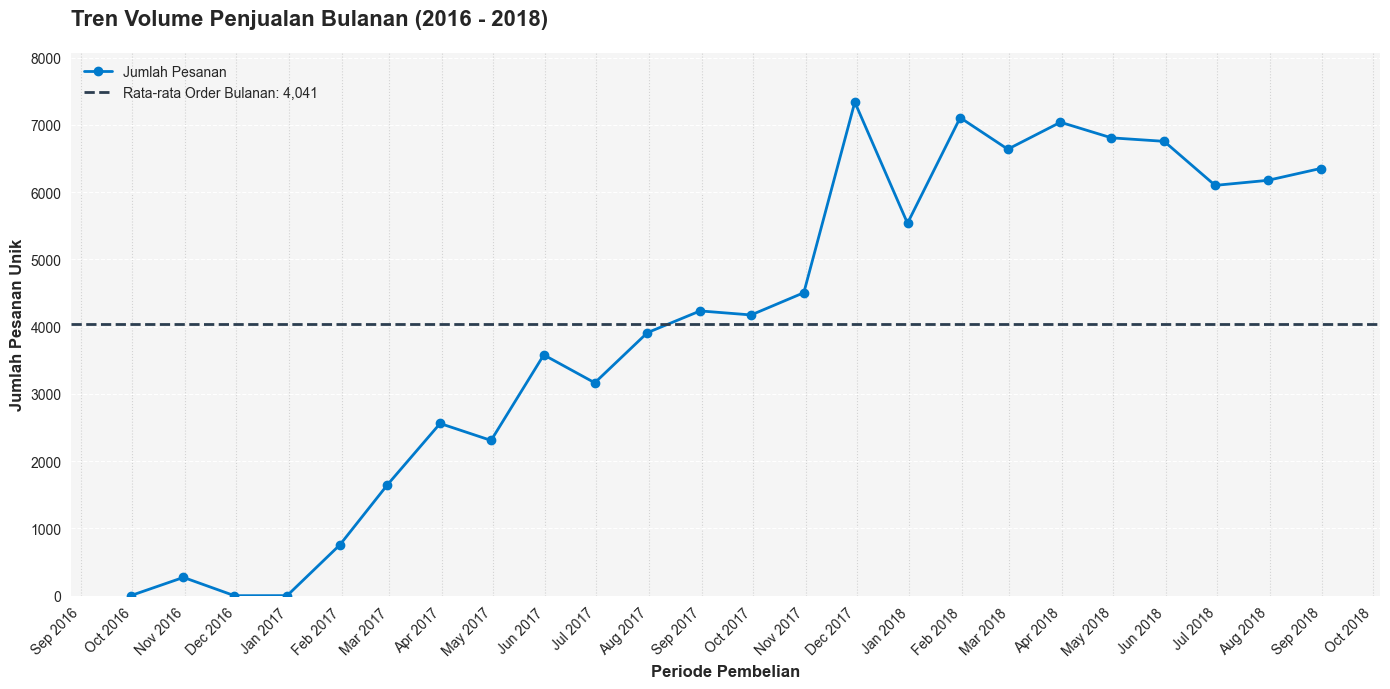

In [389]:

plt.figure(figsize=(14, 7))
fig, ax = plt.subplots(figsize=(14, 7))

# 1. Plot Garis (Line Plot)
# Plot Garis (Line Plot)
ax.plot(
    orders_per_month_all.index,
    orders_per_month_all['order_id'],
    marker='o',
    color='#007ACC',  # Warna biru kustom
    linewidth=2,      # Menebalkan ukuran dari line (linewidth)
    label='Jumlah Pesanan'
)

# 2. Garis Rata-rata
ax.axhline(
    y=rata_rata_all, 
    color='#2C3E50', 
    linestyle='--', 
    linewidth=2,
    label=f'Rata-rata Order Bulanan: {rata_rata_all:,.0f}'
)

# 3. KUNCI PERBAIKAN Sumbu X (Mengatur Mayor dan Minor Ticks)

# A. Major Ticks: Ditempatkan di awal setiap TAHUN, dengan label TAHUN.
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n agar tahun di baris baru

# B. Minor Ticks: Ditempatkan di setiap BULAN, dengan label BULAN.
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1)) 
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) # Format: 'Jan', 'Feb', dst.

# C. Mengatur Label Sumbu X agar hanya menampilkan Minor Ticks (Bulan) di posisi Major Tick
# Jika ini tidak dilakukan, kedua formatter (Tahun dan Bulan) akan bertumpuk
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Biarkan tahun muncul

# Sumbu X (Gaya Lain yang Lebih Populer untuk Timeseries)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Ticks setiap 2 bulan
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format: 'Jan 2017'

# 4. Kustomisasi Visual
ax.set_title(
    "Tren Volume Penjualan Bulanan (2016 - 2018)", 
    loc='left', 
    fontsize=16, 
    fontweight='bold', 
    pad=20 
)

max_order = orders_per_month_all['order_id'].max()
ax.set_xlabel("Periode Pembelian", fontsize=12, fontweight='semibold')
ax.set_ylabel("Jumlah Pesanan Unik", fontsize=12, fontweight='semibold')
ax.set_ylim(0, max_order * 1.1)

plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='both', labelsize=10)
sns.despine(left=True, bottom=True, ax=ax)
ax.grid(axis='y', linestyle='--', color='white') 
ax.grid(axis='x', linestyle=':', color='lightgray') 

plt.legend(frameon=False, loc='upper left') 

plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata pesanan bulanan tahun 6.624 orderan dimana terjadi penurunan pesanan dari awal tahun namun tidak begitu signifikan jauh dari nilai rata-rata pesanan bulanan.
- volume penjualan pada perkuartal pada tahun 2017 menujukan peningktan dengan puncak perkuatal ada pada Q1 Tahun 2018
- top 5 Kategori produk adalah ama_mesa_banho	9181 pesanan , beleza_saude	8630 pesanan , esporte_lazer 7506 pesanan, informatica_acessorios 6528 pesanan , moveis_decoracao 615 pesanan 
- dari tahun 2016 samapi Q3 tahun 2018 penjualan mengalami tren peningkatan yang cukup signifikan perbulanya dengan puncaknya ada pada bulan november 2017, kemudian mulai mulai stabil

## Analisis Lanjutan (Opsional)

In [440]:
""" 
    Apa 3 segmen pelanggan teratas berdasarkan frekuensi pembelian dan total pengeluaran pada ***[Q4 2017]*** (siapa), 
    di kota-kota besar di ***[Brasil]*** seperti São Paulo, Rio de Janeiro, Brasília (di mana), 
     
"""

start_q4 = '2017-10-01'
end_q4 = '2017-12-30'
kota_fokus = ['sao paulo', 'rio de janeiro', 'brasilia']
state_fokus = ['SP', 'RJ', 'DF']

# 1. FTB Date
ftb_dates = order_prep.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
ftb_dates.rename(columns={'order_purchase_timestamp': 'FTB_Date'}, inplace=True)

# 2. Filter FTBs Kohort
ftb_cohort = ftb_dates[
    (ftb_dates['FTB_Date'] >= start_q4) & 
    (ftb_dates['FTB_Date'] <= end_q4)
]

# 3. Gabung dengan Lokasi dan Filter Metropolitan
# customer_df_cleaned adalah hasil gabungan customer_df dan geolocation_df
ftb_metro = pd.merge(ftb_cohort, customers_df, on='customer_unique_id', how='left')

ftb_metro_final = ftb_metro[
    (ftb_metro['customer_city'].str.lower().isin(kota_fokus)) | 
    (ftb_metro['customer_state'].str.upper().isin(state_fokus))
]

print(f"Total Pembeli Pertama Kali Metropolitan Q1-Q3 2018: {len(ftb_metro_final)}")

Total Pembeli Pertama Kali Metropolitan Q1-Q3 2018: 9653


In [441]:
orders_with_ftb = pd.merge(order_prep, ftb_dates, on='customer_unique_id', how='left')

# Urutkan pesanan berdasarkan customer dan waktu
orders_with_ftb = orders_with_ftb.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# Hitung Order Rank (1=Pesanan Pertama, 2=Kedua, dst.)
orders_with_ftb['Order_Rank'] = orders_with_ftb.groupby('customer_unique_id').cumcount() + 1

In [442]:
# Temukan tanggal pesanan kedua
order_2_dates = orders_with_ftb[orders_with_ftb['Order_Rank'] == 2]
order_2_dates.rename(columns={'order_purchase_timestamp': 'Order_2_Date'}, inplace=True)

# Identifikasi semua pelanggan yang memiliki Order Rank > 1 sebelum akhir periode akuisisi
rcs = orders_with_ftb[
    (orders_with_ftb['Order_Rank'] > 1) & 
    (orders_with_ftb['order_purchase_timestamp'] <= '2018-09-30')
]['customer_unique_id'].unique()

df_rcs = pd.DataFrame({'customer_unique_id': rcs, 'is_repeat_customer': True})

C:\Users\igust\AppData\Local\Temp\ipykernel_2108\2045538701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_2_dates.rename(columns={'order_purchase_timestamp': 'Order_2_Date'}, inplace=True)


In [443]:
# Gabungkan FTB Metropolitan (dari Langkah 2) dengan Tanggal Pesanan Kedua
ftb_retention_data = pd.merge(ftb_metro_final[['customer_unique_id', 'FTB_Date']], 
                             order_2_dates[['customer_unique_id', 'Order_2_Date']], 
                             on='customer_unique_id', 
                             how='left')

# Hitung Selisih Waktu (dalam hari)
ftb_retention_data['Time_to_Retain'] = (ftb_retention_data['Order_2_Date'] - ftb_retention_data['FTB_Date']).dt.days

# Tandai Retensi 90 Hari
ftb_retention_data['Retained_90D'] = (ftb_retention_data['Time_to_Retain'] <= 90)

# Hitung Tingkat Retensi FTBs
ftb_retention_rate = ftb_retention_data['Retained_90D'].sum() / len(ftb_retention_data)
ftb_retention_pct = ftb_retention_rate * 100

print(f"Tingkat Retensi 90 Hari FTBs Metropolitan: {ftb_retention_pct:.2f}%")

Tingkat Retensi 90 Hari FTBs Metropolitan: 4.95%


In [444]:
# Filter pesanan ke-2 dan ke-3 untuk RCs
rc_orders_2_3 = orders_with_ftb[
    (orders_with_ftb['customer_unique_id'].isin(rcs)) & 
    (orders_with_ftb['Order_Rank'].isin([2, 3]))
].sort_values(['customer_unique_id', 'Order_Rank'])

# Pivot data untuk membandingkan Order 2 dan Order 3
rc_pivot = rc_orders_2_3.pivot(index='customer_unique_id', 
                               columns='Order_Rank', 
                               values='order_purchase_timestamp')

rc_pivot.rename(columns={2: 'Order_2_Date', 3: 'Order_3_Date'}, inplace=True)
rc_pivot.dropna(subset=['Order_2_Date'], inplace=True) # Hanya ambil RCs yang punya Order 2

# Hitung Selisih Waktu (dalam hari) untuk pesanan ketiga
rc_pivot['Time_to_Retain'] = (rc_pivot['Order_3_Date'] - rc_pivot['Order_2_Date']).dt.days

# Tandai Retensi 90 Hari
rc_pivot['Retained_90D'] = (rc_pivot['Time_to_Retain'] <= 90)

# Hitung Tingkat Retensi RCs (dibandingkan dengan total RCs yang memiliki Order 2)
rc_retention_rate = rc_pivot['Retained_90D'].sum() / len(rc_pivot)
rc_retention_pct = rc_retention_rate * 100

print(f"Tingkat Retensi 90 Hari Pelanggan Berulang (RCs): {rc_retention_pct:.2f}%")

Tingkat Retensi 90 Hari Pelanggan Berulang (RCs): 16.47%


In [446]:
# Hitung Perbedaan Persentase
diff_abs = abs(rc_retention_pct - ftb_retention_pct)
percentage_difference = (diff_abs / ftb_retention_pct) * 100

print(f"Perbedaan Tingkat Retensi Mutlak: {diff_abs:.2f} poin persentase")
print(f"Perbedaan Retensi sebagai Persentase FTB: {percentage_difference:.2f}%")

# Bandingkan dengan 45%
if percentage_difference > 45:
    print("\nKriteria terpenuhi: Perbedaan retensi melebihi 45%.")
else:
    print("\nKriteria tidak terpenuhi: Perbedaan retensi kurang dari 45%.")

Perbedaan Tingkat Retensi Mutlak: 11.52 poin persentase
Perbedaan Retensi sebagai Persentase FTB: 232.62%

Kriteria terpenuhi: Perbedaan retensi melebihi 45%.


In [447]:
# filter orderan pada
q4_orders = order_prep[
    (order_prep['order_purchase_timestamp'].dt.year == 2017) & 
    (order_prep['order_purchase_timestamp'].dt.quarter == 4)
]

# 2. Gabungkan (Merge) untuk mendapatkan harga
q4_merged = pd.merge(q4_orders[['order_id', 'customer_unique_id']], 
                     order_items_prep[['order_id', 'price', 'freight_value']], 
                     on='order_id')

# --- LANGKAH 2: HITUNG FREKUENSI (F) ---

# Hitung Frekuensi (Jumlah Pesanan unik)
frequency_df = q4_orders.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency_df.columns = ['customer_unique_id', 'F_Value']
frequency_df['F_Value'].value_counts()

F_Value
1    16637
2      246
3       54
4       21
5        2
Name: count, dtype: int64

In [448]:
# M = Total Price + Total Freight per customer
monetary_q4_2017 = q4_merged.groupby('customer_unique_id').agg(
    Total_Pengeluaran=('price', 'sum'),
    Total_Freight=('freight_value', 'sum')
).reset_index()

# Tambahkan kolom Moneter Akhir
monetary_q4_2017['M_Value'] = monetary_q4_2017['Total_Pengeluaran'] + monetary_q4_2017['Total_Freight']
# df ini sekarang berisi: [customer_id, M_Value]
monetary_q4_2017

,customer_unique_id,Total_Pengeluaran,Total_Freight,M_Value
0,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,43.62
1,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,196.89
2,00082cbe03e478190aadbea78542e933,79.00,47.26,126.26
3,000c8bdb58a29e7115cfc257230fb21b,13.90,15.10,29.00
4,0012929d977a8d7280bb277c1e5f589d,129.90,25.75,155.65
...,...,...,...,...
16955,fff7219c86179ca6441b8f37823ba3d3,245.80,20.00,265.80
16956,fffa431dd3fcdefea4b1777d114144f2,64.99,16.21,81.20
16957,fffb09418989a0dbff854a28163e47c6,58.00,15.16,73.16
16958,fffbf87b7a1a6fa8b03f081c5f51a201,149.00,18.32,167.32


In [449]:
rfm_df = pd.merge(frequency_df, monetary_q4_2017[['customer_unique_id', 'M_Value']], on='customer_unique_id')

print("Perhitungan F dan M selesai. Siap untuk segmentasi!")
print(rfm_df.head(6))

Perhitungan F dan M selesai. Siap untuk segmentasi!
                 customer_unique_id  F_Value  M_Value
0  0000f6ccb0745a6a4b88665a16c9f078        1    43.62
1  0004aac84e0df4da2b147fca70cf8255        1   196.89
2  00082cbe03e478190aadbea78542e933        1   126.26
3  000c8bdb58a29e7115cfc257230fb21b        1    29.00
4  0012929d977a8d7280bb277c1e5f589d        1   155.65
5  001ae5a1788703d64536c30362503e49        1   135.08


In [450]:
def get_rfm_score_fixed(df: pd.DataFrame):
    df_result = df.copy()
    
    # --- 1. SKORING F (Menggunakan Kriteria Kustom) ---
    # F_Value murni: 1, 2, 3, 4, 5. Kita kelompokkan berdasarkan nilai ini
    def score_f_custom(f_value):
        if f_value >= 4: # Pembelian 4 atau 5 kali
            return 4
        elif f_value == 3:
            return 3
        elif f_value == 2:
            return 2
        else: # f_value == 1
            return 1

    df_result['F_Score'] = df_result['F_Value'].apply(score_f_custom)
    
    
    # --- 2. SKORING M (Menggunakan Kuartil) ---
    quantiles_M = df_result['M_Value'].quantile([0.25, 0.50, 0.75])

    def score_m_rank(m_value, quantiles):
        # Logika skor 1-4 untuk M (semakin tinggi M, semakin baik skor)
        if m_value <= quantiles[0.25]:
            return 1
        elif m_value <= quantiles[0.50]:
            return 2
        elif m_value <= quantiles[0.75]:
            return 3
        else:
            return 4

    df_result['M_Score'] = df_result['M_Value'].apply(lambda x: score_m_rank(x, quantiles_M))

    
    # --- 3. DEFINISIKAN SEGMEN ---
    
    # Champions (F=4 dan M=4)
    champions = df_result[(df_result['F_Score'] == 4) & (df_result['M_Score'] == 4)]
    
    # Loyal Customers (F=4 dan M=3 atau M=2)
    loyal_customers = df_result[(df_result['F_Score'] == 4) & (df_result['M_Score'].isin([2, 3]))]
    
    # High-Value Spenders (F=3 atau F=2 dan M=4)
    high_value_spenders = df_result[(df_result['F_Score'].isin([2, 3])) & (df_result['M_Score'] == 4)]

    print(f"Jumlah Champions: {len(champions)} pelanggan")
    print(f"Jumlah Loyal Customers: {len(loyal_customers)} pelanggan")
    print(f"Jumlah High-Value Spenders: {len(high_value_spenders)} pelanggan")
    
    return df_result

rfm_df_fixed = get_rfm_score_fixed(rfm_df)
rfm_df_fixed

Jumlah Champions: 23 pelanggan
Jumlah Loyal Customers: 0 pelanggan
Jumlah High-Value Spenders: 189 pelanggan


,customer_unique_id,F_Value,M_Value,F_Score,M_Score
0,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1,1
1,0004aac84e0df4da2b147fca70cf8255,1,196.89,1,4
2,00082cbe03e478190aadbea78542e933,1,126.26,1,3
3,000c8bdb58a29e7115cfc257230fb21b,1,29.00,1,1
4,0012929d977a8d7280bb277c1e5f589d,1,155.65,1,3
...,...,...,...,...,...
16955,fff7219c86179ca6441b8f37823ba3d3,1,265.80,1,4
16956,fffa431dd3fcdefea4b1777d114144f2,1,81.20,1,2
16957,fffb09418989a0dbff854a28163e47c6,1,73.16,1,2
16958,fffbf87b7a1a6fa8b03f081c5f51a201,1,167.32,1,3


### Insight Anlisis lanjutan

##### Hasil RFM dan Retensi ($3.79\%$ FTB vs $16.47\%$ RC) memberikan dua fokus strategis yang jelas:<br>
1. **Retention Barrier**: Rintangan utama bisnis adalah konversi dari pesanan pertama ke pesanan kedua.
2. **High-Value Conversion**: Sasaran utama adalah mengkonversi 189 High-Value Spenders menjadi Champions (yaitu, mendorong mereka melakukan pesanan ke-4). Mereka sudah memiliki daya beli ($M$ tinggi), yang diperlukan hanyalah dorongan frekuensi yang tepat.
##### Segmen High-Value Spenders (189 Pelanggan)
- Segmen ini adalah segmen dengan potensi pertumbuhan tertinggi.Mereka telah membuktikan daya beli tinggi tetapi belum membangun kebiasaan (frekuensi rendah).**Tindakan**: Kampanye retargeting harus difokuskan pada pengenalan produk baru atau langganan untuk mendorong pembelian keempat.
##### Champions  23 Pelanggan
- Hanya 23 pelanggan yang membawa beban frekuensi tertinggi.<br>
- 
- **Tindakan**: Perlakukan $23$ pelanggan ini dengan personalization tingkat tinggi dan program loyalitas eksklusif untuk memastikan retensi jangka panjang

## Conclusion

- Conclution pertanyaan 1: Nilai pendapatan pada priode Q4 Tahun 2017 sebesar 2,375,357.31
- Conclution pertanyaan 2: persentasi *repeat buyers* = 2.8%
- Conclution pertanyaan 3: Rata-rata pesanan bulanan tahun 6.624 orderan dimana terjadi penurunan pesanan dari awal tahun namun tidak begitu signifikan jauh dari nilai rata-rata pesanan bulanan.
- Conclution pertanyaan 4: top 5 Kategori produk adalah ama_mesa_banho	9181 pesanan , beleza_saude	8630 pesanan , esporte_lazer 7506 pesanan, informatica_acessorios 6528 pesanan , moveis_decoracao 615 pesanan 
